In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.gaussian import IsotropicGauss, DiagGauss, Gauss



In [2]:
# initialize jax RNG
key = jr.PRNGKey(0)

### Isotropic Gaussian

In [3]:
# create an isotropic Gaussian
dim = 2
mu = np.zeros(dim)
sigma = 3.
log_var = jnp.log(sigma**2)
dist = IsotropicGauss(mu=mu, log_var=log_var)

In [4]:
xmin, xmax = -10, 10
ymin, ymax = -10, 10
npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
Z_flat = dist.logpdf_batch(XY)
Z = Z_flat.reshape(X.shape)

plt.figure(figsize=(5,5))
plt.contour(X, Y, jnp.exp(Z), levels=10, colors='k', linewidths=0.5)
plt.contourf(X, Y, jnp.exp(Z), levels=50, cmap='bwr')


AttributeError: 'IsotropicGauss' object has no attribute 'logpdf_batch'

Empirical mean: [0.03097183 0.00055891]
Empirical std: [3.0274687 3.029106 ]


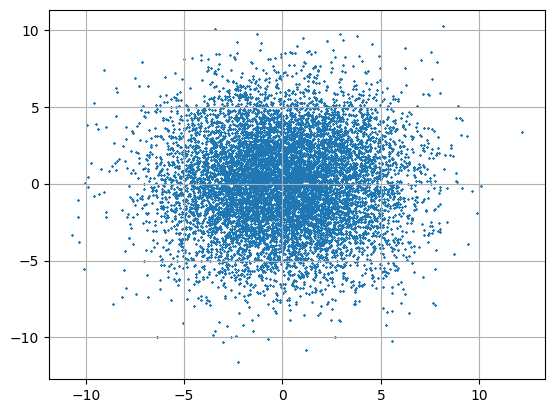

In [5]:
key, key_ = jr.split(key)
n_samples = 10_000
samples = dist.sample(key=key_, n_samples=n_samples)

# plot scatter plot of samples
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')
plt.grid()

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
var = jnp.var(samples, axis=0)
print(f"Empirical mean: {mean}")
print(f"Empirical std: {jnp.sqrt(var)}")

### Diagonal covariance

In [6]:
std_arr = jnp.array([1.,2.])
var_arr = std_arr**2
log_var = jnp.log(var_arr)
dist = DiagGauss(mu=mu, log_var=log_var)

key, key_ = jr.split(key)
n_samples = 10_000
samples = dist.sample(key=key_, n_samples=n_samples)


# plot contour plot of the distribution
xmin, xmax = -10, 10
ymin, ymax = -10, 10
npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
Z_flat = dist.logpdf_batch(XY)
Z = Z_flat.reshape(X.shape)

plt.figure(figsize=(5,5))
# plot contour plot of the distribution with levels in black
plt.contour(X, Y, jnp.exp(Z), levels=10, colors='k', linewidths=0.5)
plt.contourf(X, Y, jnp.exp(Z), levels=50, cmap='bwr')


AttributeError: 'DiagGauss' object has no attribute 'logpdf_batch'

Empirical mean: [-0.0041753   0.00351992]
Empirical std: [0.994047  1.9997904]


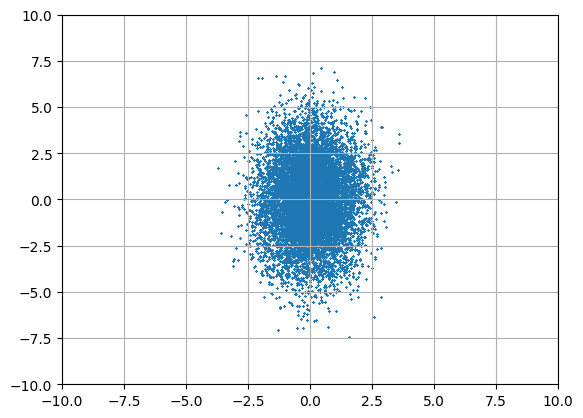

In [7]:
# plot scatter plot of samples
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
var = jnp.var(samples, axis=0)
print(f"Empirical mean: {mean}")
print(f"Empirical std: {jnp.sqrt(var)}")
plt.grid()

### General Gaussian

In [8]:
M = np.random.normal(0,1, (dim, dim))
mu = np.random.normal(0,1, dim)
cov = M @ M.T
dist = Gauss(mu=mu, cov=cov)

In [9]:
key, key_ = jr.split(key)
n_samples = 50_000
samples = dist.sample(key=key_, n_samples=n_samples)


# plot contour plot of the distribution
xmin, xmax = -10, 10
ymin, ymax = -10, 10
npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
Z_flat = dist.logpdf_batch(XY)
Z = Z_flat.reshape(X.shape)

plt.figure(figsize=(5,5))
# plot contour plot of the distribution with levels in black
plt.contour(X, Y, jnp.exp(Z), levels=10, colors='k', linewidths=0.5)
plt.contourf(X, Y, jnp.exp(Z), levels=50, cmap='bwr')




AttributeError: 'Gauss' object has no attribute 'logpdf_batch'

Empirical mean: [-1.1696687  0.6410032]
Empirical cov: 
 [[2.448895 2.747062]
 [2.747062 6.813037]]
Theoretical cov: 
 [[2.45286137 2.7302406 ]
 [2.7302406  6.74757224]]


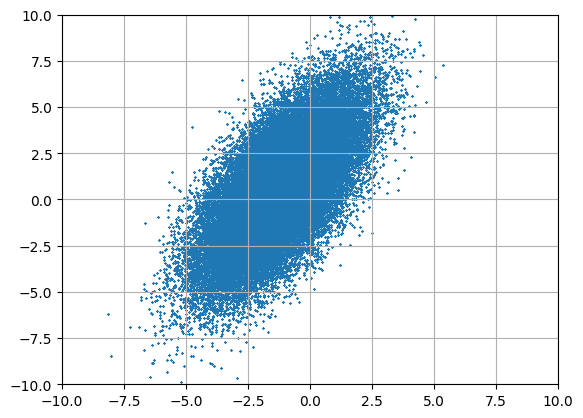

In [10]:
# plot scatter plot of samples
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')
plt.grid()

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
# covariance matrix
C = jnp.cov(samples.T)
print(f"Empirical mean: {mean}")
print(f"Empirical cov: \n {C}")
print(f"Theoretical cov: \n {cov}")